In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 2.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [15]:
!pip install -U mlxtend

     |████████████████████████████████| 1.3MB 2.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
from sklearn.utils import check_random_state
from sklearn.utils.fixes import _astype_copy_false
from sklearn.utils.validation import check_array, check_X_y
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from scipy import special, stats
from scipy.sparse import issparse
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import (as_float_array, check_array, check_X_y, safe_sqr,safe_mask)
from sklearn.utils.extmath import safe_sparse_dot, row_norms
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.feature_selection._base import SelectorMixin
from sklearn.metrics import roc_auc_score
from scipy.sparse import issparse
from scipy.special import digamma
import scipy.stats as stats
from subprocess import check_output
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing dataset
df = pd.read_csv('DLBCL.tab', delimiter='\t')
df.shape

(79, 7071)

In [3]:
df.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,AC000064_cds2_at,...,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,DLBCL FL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1,-45,176,97,-57,233,265,945,56,819,-526,-1075,569,-501,-185,-28,-132,77,564,897,-40,169,1277,-80,-20,117,684,-6,500,864,109,838,332,762,548,368,-51,48,231,102,...,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
3,25,-17,531,353,122,155,209,1688,42,639,-368,-253,892,71,157,-101,-68,136,562,623,4,278,956,193,17,344,768,226,390,912,223,904,270,668,619,248,-59,-18,153,73,...,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
4,73,91,257,80,614,507,760,2252,196,863,-618,-596,1963,-226,-237,-133,29,116,999,861,55,539,1245,44,-2,224,597,275,1270,1976,320,1171,479,986,762,412,-65,22,424,115,...,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62,DLBCL


In [4]:
df=df.dropna().loc[1:,:]

In [5]:
X = df.drop(['class'], axis=1)
X.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,AB002380_at,AB002382_at,AB002409_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000061_cds2_at,AC000061_cds3_at,AC000062_at,AC000064_cds1_at,AC000064_cds2_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,-526,-1075,569,-501,-185,-28,-132,77,564,897,-40,169,1277,-80,-20,117,684,-6,500,864,109,838,332,762,548,368,-51,48,231,102,...,353,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,-368,-253,892,71,157,-101,-68,136,562,623,4,278,956,193,17,344,768,226,390,912,223,904,270,668,619,248,-59,-18,153,73,...,328,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,-618,-596,1963,-226,-237,-133,29,116,999,861,55,539,1245,44,-2,224,597,275,1270,1976,320,1171,479,986,762,412,-65,22,424,115,...,172,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,-698,-31,1150,202,-541,162,-55,113,549,434,-51,418,900,47,15,226,430,89,476,1164,192,517,287,634,674,404,-122,21,154,174,...,224,2606,59,196,188,61,18747,17627,347,206,67,16591,9551,160,8049,-214,33,269,-23,224,1,335,-85,93,126,63,166,-99,-626,910,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,-665,-306,1460,117,-679,-61,-82,110,838,651,-74,201,454,0,-37,698,390,-17,461,815,342,444,345,648,587,198,-102,6,269,151,...,206,1408,-1,226,226,402,7871,14335,727,203,66,12369,5489,307,7405,-134,177,335,-8,248,24,170,-24,146,370,188,822,-29,-2380,350,69,608,-39,1667,-87,721,213,15,155,-26


In [6]:
# Mapping classes into integers
y = df['class']
y=y.map({'DLBCL': 1, 'FL': 0})
y.head()

2    1
3    1
4    1
5    1
6    1
Name: class, dtype: int64

In [7]:
df.dtypes

A28102         object
AB000114_at    object
AB000115_at    object
AB000220_at    object
AB000409_at    object
                ...  
Z17240_at      object
L49218_f_at    object
M71243_f_at    object
Z78285_f_at    object
class          object
Length: 7071, dtype: object

In [8]:
print(X.shape)
print(y.shape)

(77, 7070)
(77,)


In [9]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((61, 7070), (61,), (16, 7070), (16,))

Due to huge amount of time taken to train these models, I am assigning N=k_features=3.

## Task D.1: Classifying Data with Wrapper Model Sequential Forward Search

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 7070 out of 7070 | elapsed:   22.7s finished

[2020-10-16 18:25:25] Features: 1/3 -- score: 0.9672131147540983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 7069 out of 7069 | elapsed:   23.3s finished

[2020-10-16 18:25:49] Features: 2/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 7068 out of 7068 | elapsed:   25.0s finished

[2020-10-16 18:26:14] Features: 3/3 -- score: 1.0

In [17]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1633,)",[0.9672131147540983],0.967213,"(M12759_at,)",NaN,0,NaN
2,"(1152, 1633)",[1.0],1,"(L05515_at, M12759_at)",NaN,0,NaN
3,"(4, 1152, 1633)",[1.0],1,"(AB000409_at, L05515_at, M12759_at)",NaN,0,NaN


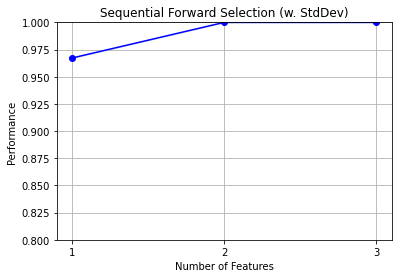

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Task D.2: Classifying Data with Wrapper Model Sequential Backward Search

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
sbs1 = SFS(knn, 
           k_features=1060, 
           forward=False,#False for backward approach 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sbs1 = sbs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

### Due to huge time taken, I have given Keyboard Interrupt to stop the job.

In [27]:
pd.DataFrame.from_dict(sbs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
7070,0.95082,NaN,[0.9508196721311475],"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(A28102, AB000114_at, AB000115_at, AB000220_at...",0,NaN


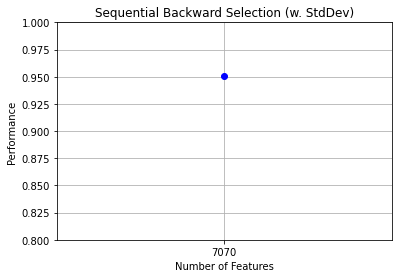

In [28]:
fig1 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

### End of All Tasks and Assignment